In [2]:
using DataFrames, ScikitLearn, PyCall, Plots, Gadfly, Vega

In [3]:
@pyimport nltk as nltk
@pyimport nltk.corpus as cNltk

/usr/local/lib/python2.7/dist-packages/nltk/app/__init__.py:28: UserWarning: nltk.app package not loaded (please install Tkinter library).
  warnings.warn("nltk.app package not loaded "
/usr/local/lib/python2.7/dist-packages/nltk/draw/__init__.py:14: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded "


In [32]:
dataset = "../datasets/instagram/dataset.csv"
full_df = readtable(dataset)
number_likes = full_df[:numberLikes]
delete!(full_df, :username)
delete!(full_df, :urlProfile)
delete!(full_df, :urlImgProfile)
delete!(full_df, :filename)
delete!(full_df, :url)
delete!(full_df, :urlImage)
delete!(full_df, :isVideo)

16539√ó13 DataFrames.DataFrame
‚îÇ Row   ‚îÇ numberPosts ‚îÇ website             ‚îÇ numberFollowing ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1     ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚îÇ 2     ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚îÇ 3     ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚îÇ 4     ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚îÇ 5     ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚îÇ 6     ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚îÇ 7     ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚îÇ 8     ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚îÇ 9     ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚îÇ 10    ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚îÇ 11    ‚îÇ 988         ‚îÇ "www.sylviemeis.de" ‚îÇ 233             ‚îÇ
‚ãÆ
‚îÇ 16528 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16529 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16530 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16531 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16532 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16533 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16534 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16535 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16536 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16537 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16538 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ
‚îÇ 16539 ‚îÇ 1982        ‚îÇ NA                  ‚îÇ 0               ‚îÇ

‚îÇ Row   ‚îÇ descriptionProfile                                                                                                                                       ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1     ‚îÇ "TV Host Let's Dance for RTL Germany / SBS6 / Philips-Sonicare / Deichmann - Sylvie Meis ShoeCollection /Holiday On Ice-Believe / Owner Meis Enterprise" ‚îÇ
‚îÇ 2     ‚îÇ "TV Host Let's Dance for RTL Germany / SBS6 / Philips-Sonicare / Deichmann - Sylvie Meis ShoeCollection /Holiday On Ice-Believe / Owner Meis Enterprise" ‚îÇ
‚îÇ 3     ‚îÇ "TV Host Let's Dance for RTL Germany / SBS6 / Philips-Sonicare / Deichmann - Sylvie Meis ShoeCollection /Holiday On Ice-Believe / Owner Meis Enterprise" ‚îÇ
‚îÇ 4     ‚îÇ "TV Host Let's Dance for RTL Germany / SBS6 / Philips-Sonicare / Deichmann - Sylvie Meis ShoeCollection /Holiday On Ice-Believe / Owner Meis Enterprise" ‚îÇ
‚îÇ 5     ‚îÇ "TV Host Let's Dance for RTL Germany / SBS6 / Philips-Sonicare / Deichmann - Sylvie Meis ShoeCollection /Holiday On Ice-Believe / Owner Meis Enterprise" ‚îÇ
‚îÇ 6     ‚îÇ "TV Host Let's Dance for RTL Germany / SBS6 / Philips-Sonicare / Deichmann - Sylvie Meis ShoeCollection /Holiday On Ice-Believe / Owner Meis Enterprise" ‚îÇ
‚îÇ 7     ‚îÇ "TV Host Let's Dance for RTL Germany / SBS6 / Philips-Sonicare / Deichmann - Sylvie Meis ShoeCollection /Holiday On Ice-Believe / Owner Meis Enterprise" ‚îÇ
‚îÇ 8     ‚îÇ "TV Host Let's Dance for RTL Germany / SBS6 / Philips-Sonicare / Deichmann - Sylvie Meis ShoeCollection /Holiday On Ice-Bel

In [5]:
function clean(target)
    letters = replace(target, r"[^a-zA-Z]", " ")
    lower = split(lowercase(letters))
    words = [w for w in lower if !in(w, cNltk.stopwords[:words]("english"))]
    words = [w for w in words if length(w) .> 1]
    return words
end

clean (generic function with 1 method)

# Post Description 

In [12]:
clean_df = []
for i = 1:length(full_df[:description])
    if(isna(full_df[:description][i]))
        continue
    else
        x = clean(full_df[:description][i])
        #push!(clean_df, x)
        push!(clean_df, join(x, " "))
    end
end

In [13]:
writedlm("../datasets/instagram/cleaned", clean_df, ",")

In [42]:
@pyimport sklearn.feature_extraction.text as sk_text
clean_vec = sk_text.CountVectorizer(tokenizer = nothing, max_features = 500, stop_words = nothing)
clean_features = clean_vec[:fit_transform](clean_df)
# Can use toarray bc sklearn fit_transform returns a numpy sparce matrix
clean_features = clean_features[:toarray]()

16319√ó500 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  ‚Ä¶  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  ‚Ä¶  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  ‚Ä¶  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  

In [29]:
vocabulary = clean_vec[:get_feature_names]()
new_vocab = []
for w in vocabulary
    if length(w) > 5
        push!(new_vocab, w)
    end
end
print(join(new_vocab, " "))

account actually adventure almost already always amazing another anyone anything architecture around available awesome barcelona beautiful beautifuldestinations beauty become behind believe berlin better birthday breakfast california camera challenge chance change chocolate coachella coffee collection coming comment community conservation couple course delicious dengan design details different easter enough europe everyone everything excited experience explore family fashion favorite favourite featured feeling finally fitness follow followers forget france friday friend friends getting gracias grateful guides hashtag healthy images important incredible inspiration inspired instagram island journey liketk liketkit liketoknow little living location london looking lovely madwhips magazine makeup making mercedes millionaire moment moments monday morning mountain mountains natgeo natgeocreative national natural nature nothing official online outfit people perfect performance photograph phot

In [43]:
using Pandas
clean_features = Pandas.DataFrame(data = clean_features, columns=vocabulary)

       able  account  actually  ad  ada  add  adventure  ago  air  al  \
0         0        0         0   0    0    0          0    0    0   0   
1         0        0         0   0    0    0          0    0    0   0   
2         0        0         0   0    0    0          0    0    0   0   
3         0        0         0   0    0    0          0    0    0   0   
4         0        0         0   0    0    0          0    0    0   0   
5         0        0         0   0    0    0          0    0    0   0   
6         0        0         0   0    0    0          0    0    0   0   
7         0        0         0   0    0    0          0    0    0   0   
8         0        0         0   0    0    0          0    0    0   0   
9         0        0         0   0    0    0          0    0    0   0   
10        0        0         0   0    0    0          0    0    0   0   
11        0        0         0   0    0    0          0    0    0   0   
12        0        0         0   0    0    0       

## User Description

In [44]:
clean_user = []
for i = 1:length(full_df[:descriptionProfile])
    if(isna(full_df[:descriptionProfile][i]))
        continue
    else
        x = clean(full_df[:descriptionProfile][i])
        #push!(clean_df, x)
        push!(clean_user, join(x, " "))
    end
end

In [45]:
writedlm("../datasets/instagram/cleaned_user", clean_user, ",")

In [46]:
clean_vec_user = sk_text.CountVectorizer(tokenizer = nothing, max_features = 250, stop_words = nothing)
clean_features_user = clean_vec_user[:fit_transform](clean_user)
clean_features_user = clean_features_user[:toarray]()
size(clean_features_user)

(16148,250)

In [48]:
user_vocabulary = clean_vec_user[:get_feature_names]()
print(join(user_vocabulary, " "))

account actor actress adventure adventures advertising ambassador amsterdam angeles anthony app art artist athlete au australia author available bali based beautiful beauty best blog blogger book booking bookings br brand brasil business california camera cat ceo cep channel check city click co coach collaborations com community consultant contact contato content contributor cookbook creative creator credit currently daily day de design designer digital director download dream dreams dubai earth el em email enquiries entrepreneur explorer facebook family fashion fb feature featured feed filmmaker fitness follow food founder free french fun geographic germany get girl gmail go good great hair health heart hello hi home host hotmail http human icloud ig ii images influencer info inquiries inspiration instagram istanbul italy kik la latest learn let life lifestyle like line link live living location london los love lover made madwhips magazine mail make makeup man management may media men

In [49]:
clean_features_user = Pandas.DataFrame(data=clean_features_user, columns=user_vocabulary)

       account  actor  actress  adventure  adventures  advertising  \
0            0      0        0          0           0            0   
1            0      0        0          0           0            0   
2            0      0        0          0           0            0   
3            0      0        0          0           0            0   
4            0      0        0          0           0            0   
5            0      0        0          0           0            0   
6            0      0        0          0           0            0   
7            0      0        0          0           0            0   
8            0      0        0          0           0            0   
9            0      0        0          0           0            0   
10           0      0        0          0           0            0   
11           0      0        0          0           0            0   
12           0      0        0          0           0            0   
13           0      

## Mentions

In [50]:
clean_mentions = []
for i = 1:length(full_df[:mentions])
    if(isna(full_df[:mentions][i]))
        continue
    else
        x = clean(full_df[:mentions][i])
        #push!(clean_df, x)
        push!(clean_mentions, join(x, " "))
    end
end

In [51]:
])writedlm("../datasets/instagram/cleaned_mentions", clean_mentions, ",")

In [53]:
clean_vec_mentions = sk_text.CountVectorizer(tokenizer = nothing, max_features = 250, stop_words = nothing)
clean_features_mentions = clean_vec_mentions[:fit_transform](clean_mentions)
clean_features_mentions = clean_features_mentions[:toarray]()
size(clean_features_mentions)

(16539,250)

In [54]:
mentions_vocabulary = clean_vec_mentions[:get_feature_names]()
print(join(mentions_vocabulary, " "))

accorhotels adidasoriginals afa aloyoga amazingcitytrips americanmusclehd americanstyle anastasiabeverlyhills app art artistic artofvisuals arts asos au aus australia balenciaga beautifulcuisines beautifuldestinations beautifulhotels beautifulmatters benefitcosmetics bestmeow bestvacations bestwoof bluemint body bodyangelactivewear boosted buzzfeedfood cars cbezerraphotos celine chanelofficial change chique chloe cluse cntraveler co coachella com complex daily dailyfoodfeed dametraveler danielwellington daviddoubilet de dior dolcegabbana dotzsoh doyoutravel earth earthpix ehplabs es esteelauder europe extremenature fashion fashionactive fashiongoalsz fashionzine fit fitness food foodandwine forever frique germany getolympus gmail gomme gq gucci guy guytang guytangmydentityteam gypsea hairsandstyles hammond hartmanfineart hawkeyehuey highfashionmen hm hollysisson home houseoflashes hudabeauty huffposttaste hypebeast ig ihavethisthingwithfloors indian indonesian infatuation inflowtravel 

In [56]:
clean_vec_mentions = Pandas.DataFrame(data = clean_features_mentions, columns = mentions_vocabulary)

       accorhotels  adidasoriginals  afa  aloyoga  amazingcitytrips  \
0                0                0    0        0                 0   
1                0                0    0        0                 0   
2                0                0    0        0                 0   
3                0                0    0        0                 0   
4                0                0    0        0                 0   
5                0                0    0        0                 0   
6                0                0    0        0                 0   
7                0                0    0        0                 0   
8                0                0    0        0                 0   
9                0                0    0        0                 0   
10               0                0    0        0                 0   
11               0                0    0        0                 0   
12               0                0    0        0                 0   
13    

## Localization

In [57]:
clean_localization = []
for i = 1:length(full_df[:localization])
    if(isna(full_df[:localization][i]))
        continue
    else
        x = clean(full_df[:localization][i])
        #push!(clean_df, x)
        push!(clean_localization, join(x, " "))
    end
end

In [58]:
writedlm("../datasets/instagram/cleaned_localization", clean_localization, ",")

In [59]:
clean_vec_localization = sk_text.CountVectorizer(tokenizer = nothing, max_features = 250, stop_words = nothing)
clean_features_localizations = clean_vec_localization[:fit_transform](clean_localization)
clean_features_localizations = clean_features_localizations[:toarray]()
size(clean_features_localizations)

(6887,250)

In [60]:
localizations_vocabulary = clean_vec_localization[:get_feature_names]()
print(join(localizations_vocabulary, " "))

abu affalterbach airport alberta american amg amsterdam angeles antarctica arab argentina arizona art arts atlanta australia austria bali banff bar barcelona baselworld bay beach beirut bel belgium berlin beverly big bio black blue bora bordeaux brazil bridge british brooklyn cafe california canyon cape carlton carolina center central centre china city club coachella coast coffee colombia columbia constance copenhagen costa cuba dallas de del denmark desert dhabi di disney district dolomiti downtown du dubai east el eleuthera emirates empire falls faroe festival finland fitness florida forn four france francesc francisco frankfurt garden georgia germany gold grand greece halaveli hamburg hawaii hills hollywood hong hotel house ibiza iceland inca indonesia international island islands istanbul italy janeiro japan jewellery jordan juan kauai kingdom kong kuala la lake las le lebanon link lisbon lizard london los lumpur madrid maldives malibu manhattan market marrakesh maui maya melrose m

In [61]:
clean_features_localizations = Pandas.DataFrame(data = clean_features_localizations, columns = localizations_vocabulary)

      abu  affalterbach  airport  alberta  american  amg  amsterdam  angeles  \
0       0             0        0        0         0    0          0        0   
1       0             0        0        0         0    0          0        0   
2       0             0        0        0         0    0          0        0   
3       0             0        0        0         0    0          0        0   
4       0             0        0        0         0    0          0        0   
5       0             0        0        0         0    0          0        0   
6       0             0        0        0         0    0          0        0   
7       0             0        0        0         0    0          0        0   
8       0             0        0        0         0    0          0        0   
9       0             0        0        0         0    0          0        0   
10      0             0        0        0         0    0          0        0   
11      0             0        0        

## Messing with localization

In [5]:
df_places = full_df[[:localization, :alias, :date]]
completecases!(df_places)

6887√ó3 DataFrames.DataFrame
‚îÇ Row  ‚îÇ localization                   ‚îÇ alias         ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1    ‚îÇ "Amman, Jordan"                ‚îÇ "3ala2o"      ‚îÇ
‚îÇ 2    ‚îÇ "Bologna, Italy"               ‚îÇ "3ala2o"      ‚îÇ
‚îÇ 3    ‚îÇ "Turin, Italy"                 ‚îÇ "7ikhals"     ‚îÇ
‚îÇ 4    ‚îÇ "Turin, Italy"                 ‚îÇ "7ikhals"     ‚îÇ
‚îÇ 5    ‚îÇ "Turin, Italy"                 ‚îÇ "7ikhals"     ‚îÇ
‚îÇ 6    ‚îÇ "Turin, Italy"                 ‚îÇ "7ikhals"     ‚îÇ
‚îÇ 7    ‚îÇ "Turin, Italy"                 ‚îÇ "7ikhals"     ‚îÇ
‚îÇ 8    ‚îÇ "Turin, Italy"                 ‚îÇ "7ikhals"     ‚îÇ
‚îÇ 9    ‚îÇ "Turin, Italy"                 ‚îÇ "7ikhals"     ‚îÇ
‚îÇ 10   ‚îÇ "Turin, Italy"                 ‚îÇ "7ikhals"     ‚îÇ
‚îÇ 11   ‚îÇ "Turin, Italy"                 ‚îÇ "7ikhals"     ‚îÇ
‚ãÆ
‚îÇ 6876 ‚îÇ "Grand Hotel Minareto"         ‚îÇ "zoepastelle" ‚îÇ
‚îÇ 6877 ‚îÇ "Taormina"                     ‚îÇ "zoepastelle" ‚îÇ
‚îÇ 6878 ‚îÇ "Hotel Metropole Taormina"     ‚îÇ "zoepastelle" ‚îÇ
‚îÇ 6879 ‚îÇ "Piraino"                      ‚îÇ "zoepastelle" ‚îÇ
‚îÇ 6880 ‚îÇ "Sicilia, Italy"               ‚îÇ "zoepastelle" ‚îÇ
‚îÇ 6881 ‚îÇ "Sicilia, Italy"               ‚îÇ "zoepastelle" ‚îÇ
‚îÇ 6882 ‚îÇ "Aeroporto di Milano Malpensa" ‚îÇ "zoepastelle" ‚îÇ
‚îÇ 6883 ‚îÇ "La Casa Alfredo"              ‚îÇ "zoepastelle" ‚îÇ
‚îÇ 6884 ‚îÇ "Alacatƒ±"                      ‚îÇ "zynp"        ‚îÇ
‚îÇ 6885 ‚îÇ "Alacatƒ±"                      ‚îÇ "zynp"        ‚îÇ
‚îÇ 6886 ‚îÇ "Ala√ßatƒ± the Design Hotel"     ‚îÇ "zynp"        ‚îÇ
‚îÇ 6887 ‚îÇ "Meat And Fish"                ‚îÇ "zyoshka"     ‚îÇ

‚îÇ Row  ‚îÇ date                       ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1    ‚îÇ "2017-03-28T05:00:00.000Z" ‚îÇ
‚îÇ 2    ‚îÇ "2017-03-02T06:00:00.000Z" ‚îÇ
‚îÇ 3    ‚îÇ "2017-04-28T05:00:00.000Z" ‚îÇ
‚îÇ 4    ‚îÇ "2017-04-21T05:00:00.000Z" ‚îÇ
‚îÇ 5    ‚îÇ "2017-04-12T05:00:00.000Z" ‚îÇ
‚îÇ 6    ‚îÇ "2017-04-05T05:00:00.000Z" ‚îÇ
‚îÇ 7    ‚îÇ "2017-03-30T05:00:00.000Z" ‚îÇ
‚îÇ 8    ‚îÇ "2017-03-27T05:00:00.000Z" ‚îÇ
‚îÇ 9    ‚îÇ "2017-03-23T05:00:00.000Z" ‚îÇ
‚îÇ 10   ‚îÇ "2017-03-13T05:00:00.000Z" ‚îÇ
‚îÇ 11   ‚îÇ "2017-03-08T06:00:00.000Z" ‚îÇ
‚ãÆ
‚îÇ 6876 ‚îÇ "2017-04-28T05:00:00.000Z" ‚îÇ
‚îÇ 6877 ‚îÇ "2017-04-28T05:00:00.000Z" ‚îÇ
‚îÇ 6878 ‚îÇ "2017-04-27T05:00:00.000Z" ‚îÇ
‚îÇ 6879 ‚îÇ "2017-04-26T05:00:00.000Z" ‚îÇ
‚îÇ 6880 ‚îÇ "2017-04-25T05:00:00.000Z" ‚îÇ
‚îÇ 6881 ‚îÇ "2017-04-24T05:00:00.000Z" ‚îÇ
‚îÇ 6882 ‚îÇ "2017-04-24T05:00:00.000Z" ‚îÇ
‚îÇ 6883 ‚îÇ "2017-04-23T05:00:00.000Z" ‚îÇ
‚îÇ 6884 ‚îÇ "2017-04-09T05:00:00.000Z" ‚îÇ
‚îÇ 6885 ‚îÇ "2017-04-07T05:00:00.000Z" ‚îÇ
‚îÇ 6886 ‚îÇ "2017-04-06T05:00:00.000Z" ‚îÇ
‚îÇ 6887 ‚îÇ "2017-04-27T05:00:00.000Z" ‚îÇ

In [31]:
unique(df_places[:localization])
n_places = by(df_places, :localization, nrow)
s = n_places[[:x1]]
@show sum(s[:x1])
sort!(n_places, cols = [:x1], rev = true)

sum(s[:x1]) = 6887


3332√ó2 DataFrames.DataFrame
‚îÇ Row  ‚îÇ localization                                  ‚îÇ x1  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1    ‚îÇ "Los Angeles, California"                     ‚îÇ 221 ‚îÇ
‚îÇ 2    ‚îÇ "New York, New York"                          ‚îÇ 170 ‚îÇ
‚îÇ 3    ‚îÇ "Paris, France"                               ‚îÇ 90  ‚îÇ
‚îÇ 4    ‚îÇ "Palm Springs, California"                    ‚îÇ 67  ‚îÇ
‚îÇ 5    ‚îÇ "London, United Kingdom"                      ‚îÇ 66  ‚îÇ
‚îÇ 6    ‚îÇ "Stockholm, Sweden"                           ‚îÇ 48  ‚îÇ
‚îÇ 7    ‚îÇ "Toronto, Ontario"                            ‚îÇ 46  ‚îÇ
‚îÇ 8    ‚îÇ "Coachella Music and Arts Festival"           ‚îÇ 45  ‚îÇ
‚îÇ 9    ‚îÇ "Coachella Valley"                            ‚îÇ 45  ‚îÇ
‚îÇ 10   ‚îÇ "Istanbul, Turkey"                            ‚îÇ 38  ‚îÇ
‚îÇ 11   ‚îÇ "Bali, Indonesia"                             ‚îÇ 35  ‚îÇ
‚ãÆ
‚îÇ 3321 ‚îÇ "‡∏´‡∏≤‡∏î‡∏û‡∏£‡∏∞‡πÅ‡∏≠‡∏∞ ‡πÄ‡∏Å‡∏≤‡∏∞‡∏•‡∏±‡∏ô‡∏ï‡∏≤ ‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà"                     ‚îÇ 1   ‚îÇ
‚îÇ 3322 ‚îÇ "‡πÄ‡∏Å‡∏≤‡∏∞‡∏á‡πà‡∏≤‡∏°‡∏ô‡πâ‡∏≠‡∏¢ ‡∏á‡πà‡∏≤‡∏°‡πÉ‡∏´‡∏ç‡πà"                           ‚îÇ 1   ‚îÇ
‚îÇ 3323 ‚îÇ "‡πÄ‡∏Å‡∏≤‡∏∞‡∏û‡∏£‡∏∞‡∏ó‡∏≠‡∏á,‡∏û‡∏±‡∏á‡∏á‡∏≤ ( Koh Pra Thong ) Phang-Nga" ‚îÇ 1   ‚îÇ
‚îÇ 3324 ‚îÇ "Â†ÖÂ∞ºÂú∞Âüé"                                    ‚îÇ 1   ‚îÇ
‚îÇ 3325 ‚îÇ "ÂØ∫Áî∞ÂÄâÂ∫´ TERRADA"                            ‚îÇ 1   ‚îÇ
‚îÇ 3326 ‚îÇ "ÂΩ©ËôπÈÇ®"                                      ‚îÇ 1   ‚îÇ
‚îÇ 3327 ‚îÇ "Êù±‰∫¨„Çπ„Ç´„Ç§„ÉÑ„É™„Éº / Tokyo Skytree"            ‚îÇ 1   ‚îÇ
‚îÇ 3328 ‚îÇ "Ê£ÆÁæéË°ìÈ§® Mori Art Museum, Tokyo"             ‚îÇ 1   ‚îÇ
‚îÇ 3329 ‚îÇ "ÊΩçÂùäÂ≠¶Èô¢"                                    ‚îÇ 1   ‚îÇ
‚îÇ 3330 ‚îÇ "ÁöáÂ±ÖÊù±Âæ°Ëãë / Imperial Palace East Gardens"   ‚îÇ 1   ‚îÇ
‚îÇ 3331 ‚îÇ "ÁõÆÈªíÂ∑ù"                                      ‚îÇ 1   ‚îÇ
‚îÇ 3332 ‚îÇ "Ëäù„Åñ„Åè„ÇâÂÖ¨Âúí"                                ‚îÇ 1   ‚îÇ

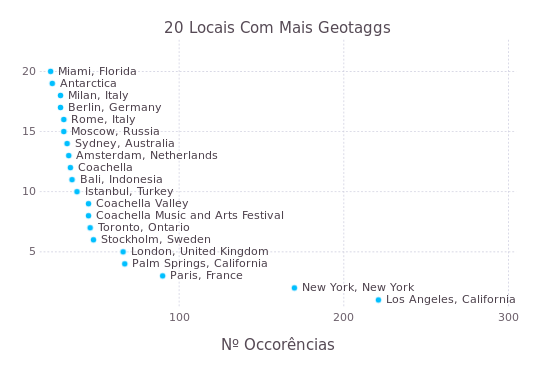

In [7]:
Gadfly.plot(n_places, x=n_places[:x1][1:20],label = n_places[:localization][1:20],Geom.point, Geom.label(hide_overlaps = false, position = :right),
            Coord.cartesian(xmin=20, xmax=300, ymax = 22),
            Guide.xlabel("N¬∫ Occor√™ncias"), Guide.title("20 Locais Com Mais Geotaggs"), Scale.y_continuous,
            Scale.x_continuous)

## Basic Data Analysis

In [8]:
data = full_df[[:numberPosts, :numberFollowing, :numberFollowers, :numberLikes]]
describe(data)
@show std(data[:numberPosts])
@show std(data[:numberFollowing])
@show std(data[:numberFollowers])
@show std(data[:numberLikes])

numberPosts
Summary Stats:
Mean:           2315.732451
Minimum:        15.000000
1st Quartile:   787.000000
Median:         1481.000000
3rd Quartile:   2932.000000
Maximum:        27671.000000
Length:         16539
Type:           Int64

numberFollowing
Summary Stats:
Mean:           2590.562670
Minimum:        0.000000
1st Quartile:   191.000000
Median:         396.000000
3rd Quartile:   645.000000
Maximum:        1838511.000000
Length:         16539
Type:           Int64

numberFollowers
Summary Stats:
Mean:           997829.409940
Minimum:        124965.000000
1st Quartile:   198039.000000
Median:         393843.000000
3rd Quartile:   935310.000000
Maximum:        22130730.000000
Length:         16539
Type:           Int64

numberLikes
Summary Stats:
Mean:           24414.257875
Minimum:        0.000000
1st Quartile:   3232.500000
Median:         7351.000000
3rd Quartile:   18357.000000
Maximum:        1115123.000000
Length:         16539
Type:           Int64

std(data[:numberPosts

64220.60332902957

| Coluna | M√©dia | Desvio Padr√£o | M√≠nimo | M√°ximo | 25% | 75 % |         
| :---- |:---- | :---- | :---- | :---- | :---- | :---- |
|numberPosts| 2315.73 | 2655.38 |  15 | 27671 | 787.00 | 2932.00
|numberFollowing|  2590.56 | 59090.66 |  0 | 1838511 | 191.00 | 645.00
|numberFollowers| 997829.40 | 1.93 |  124965 | 22130730 | 198039.00 | 935310.00
|numberLikes| 24414.25 | 64220.60 |  0 | 1115123 | 3232.00 | 18357.00


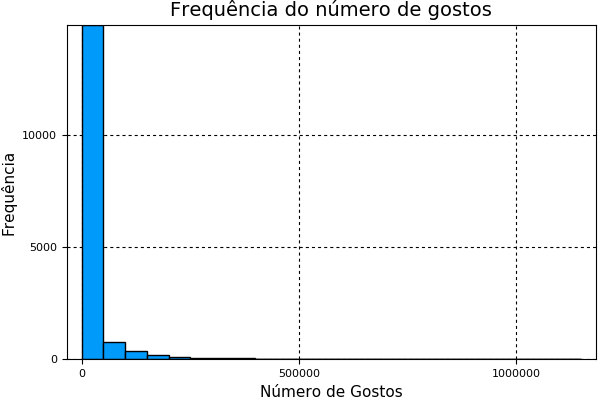

In [37]:
Plots.histogram(data[:numberLikes], xlabel="N√∫mero de Gostos", ylabel="Frequ√™ncia", title="Frequ√™ncia do n√∫mero de gostos", legend = false)


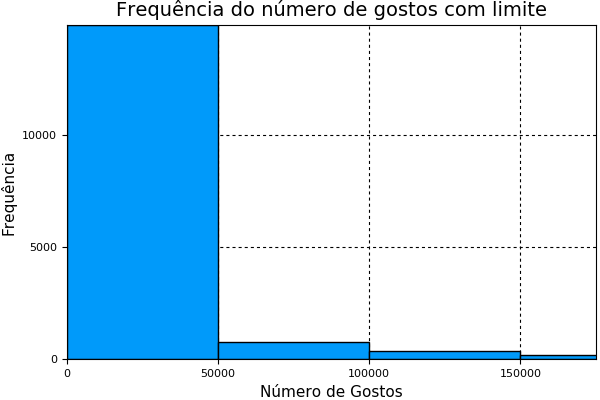

In [50]:
Plots.histogram(data[:numberLikes], xlabel="N√∫mero de Gostos", ylabel="Frequ√™ncia", title="Frequ√™ncia do n√∫mero de gostos com limite",
                xlims = (-3,175000), legend = false)

# //TODO think about filtering the source of data to likes < 1M and flwrs < 200k

# Number of Followers and the Number of Likes


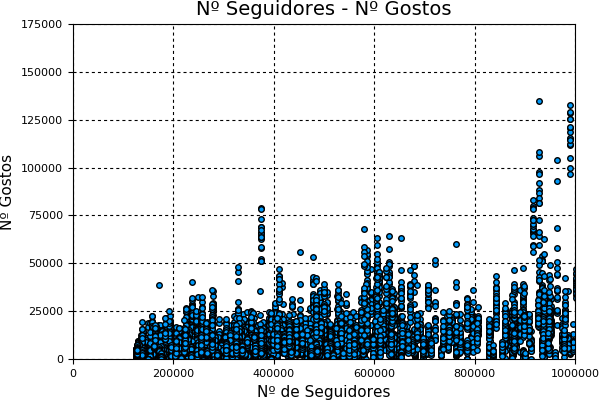

In [45]:
Plots.scatter(data[:numberFollowers], data[:numberLikes], xlims = (0,1000000), ylims=(0, 175000),
                xlabel = "N¬∫ de Seguidores", ylabel="N¬∫ Gostos", title="N¬∫ Seguidores - N¬∫ Gostos", legend=false)

# // List of todos
###### 1. Get descriptions for the graphs obove
###### 2. Extract Features from websites field (Find most used web)
###### 3. Day of the week with most posts

In [13]:
@pyimport tldextract as url

In [33]:
before_filter = length(full_df[:website])
websites = dropna(unique(full_df[:website]))
after = before_filter - length(websites)
ppl_no_link = (after*100/before_filter)
clean_websites = []
for web in websites
    e = url.extract(web)  
    push!(clean_websites, e[2])
end

unique(clean_websites)
println("$ppl_no_link% has links")

94.96341979563456% has links


In [15]:
allSites = nltk.FreqDist([w for w in clean_websites])
allSites = sort(collect(zip(values(allSites), keys(allSites))), rev = true)

553-element Array{Tuple{Any,Any},1}:
 (91,"youtu")               
 (54,"bit")                 
 (41,"youtube")             
 (39,"facebook")            
 (19,"instagram")           
 (9,"goo")                  
 (4,"soundcloud")           
 (4,"fb")                   
 (3,"vk")                   
 (3,"vimeo")                
 (3,"twitter")              
 (3,"imdb")                 
 (2,"tinyurl")              
 ‚ãÆ                          
 (1,"Bit")                  
 (1,"BeckermanBlog")        
 (1,"BeJamin")              
 (1,"Amplifier")            
 (1,"AllBeautyBlog")        
 (1,"AlessandroCarpentiero")
 (1,"ANNIJOR")              
 (1,"ANADELIA")             
 (1,"99escapes")            
 (1,"21buttons")            
 (1,"1and1life")            
 (1,"12y2")                 

In [16]:
Patchwork.load_js_runtime()
n_sites = length(clean_websites)
youtube = allSites[1][1] + allSites[3][1]
bitly = allSites[2][1]
fb = allSites[4][1] + allSites[9][1]
twitter = allSites[12][1]
sound = allSites[8][1]
println("Links to YouTube channels or YouTube videos: $(((youtube/n_sites)*100))%")
println("Links Bitly url shortener: $((bitly/n_sites)*100)%")
println("Links to fb profiles: $((fb/n_sites)*100)%")
println("Links to twitter, vimeo, imdb represent: $((twitter/n_sites)*100)% each")
println("Links to soundcloud: $((sound/n_sites)*100)%")
println("Mais ou menos 72% dos restantes links s√£o para outros sites")

df_sites = DataFrame()
df_sites[:websites] = ["Youtube", "Bitly", "Facebook", "Twitter", "Vimeo", "Imdb","Soundcloud", "Other Sites"]
df_sites[:perc] = [16, 6,5,0.4,0.4,0.4,0.5,72]
Vega.piechart(y = df_sites[:perc], x = df_sites[:websites])

Links to YouTube channels or YouTube videos: 15.846338535414164%
Links Bitly url shortener: 6.482593037214886%
Links to fb profiles: 5.042016806722689%
Links to twitter, vimeo, imdb represent: 0.36014405762304924% each
Links to soundcloud: 0.4801920768307323%
Mais ou menos 72% dos restantes links s√£o para outros sites


In [35]:
function timestamp_parse(df::DataArray)
  array = []
  for i in 1:size(df,1)
    tmp = split(df[i], "T")
    date = tmp[1]
    hours = tmp[2]
    date = split(date, "-")
    x = split(hours, ".")
    hours = split(x[1], ":")
    year, month, day = date
    hour, minutes, seconds = hours
    dt=DateTime(parse(Int64, year), parse(Int64, month),parse(Int64, day), parse(Int64, hour), parse(Int64, minutes), parse(Int64, seconds))

    array = push!(array, dt)
  end
  return array
end

timestamp_parse (generic function with 1 method)

In [36]:
@time dates = timestamp_parse(full_df[:date])
full_df[:weekday] = [Dates.dayname(date) for date in dates]
#dates
week_days = by(full_df, :weekday, nrow)
describe(week_days)

  0.249524 seconds (322.28 k allocations: 14.221 MB, 76.34% gc time)
weekday
Summary Stats:
Length:         7
Type:           String
Number Unique:  7

x1
Summary Stats:
Mean:           2362.714286
Minimum:        1785.000000
1st Quartile:   2187.500000
Median:         2418.000000
3rd Quartile:   2457.000000
Maximum:        3047.000000
Length:         7
Type:           Int64




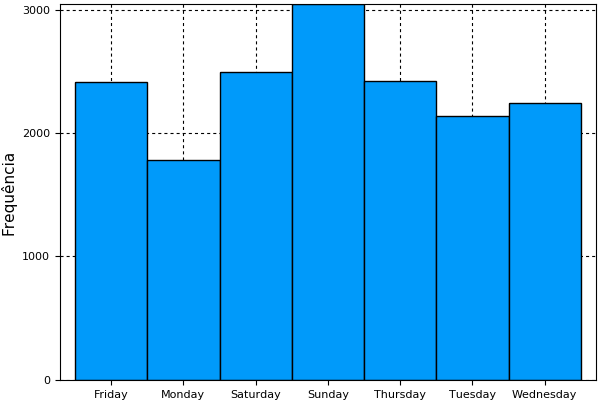

In [158]:
Plots.bar(week_days[:weekday], week_days[:x1], legend=false, ylabel="Frequ√™ncia")

<h3>Basic Dataset Analysis Conclusions</h3>
<p>M√©trica base (tabela) mostra que o n√∫mero de likes tem um desvio padr√£o muito grande 64220.60, ou seja h√° uma grande diferen√ßa visto que a m√©dia de gostos √© de 24414.25, contudo 75% tem menos de 18357.00 gostos. O histograma confirma que a maioria dos posts tem menos de 200000 gostos. Se "ignorarmos" os perfis com menos de 1M de seguidores e com menos de 200K gostos, muito prov√°velmente iriamos ter uma desvio muito menos e os valores iam ser muito mais pr√≥ximos. Estes perfis podem j√° ser considerados de personalidades ou celebridades e n√£o de "pessoas influentes".</p>
<h4>Numero de Seguidores</h4>
<p>O N√∫mero de seguidores nem sempre quer dizer que tem mais influencia = gostos. No gr√°fico do n¬∫ de gostos vs n¬∫ de seguidores, podemos ver um aumento extramamente ligeiro do n¬∫ de gostos conforme o n¬∫ de seguidores aumenta, portanto o n¬∫ de seguidores sozinho n√£o √© um bom medidor da influencia das pessoas no instagram.</p>
<h4>Outros</h4>
<p>No que diz respeito √† <b>localiza√ß√£o</b>, os locais com mais identifica√ß√µes s√£o Los Angeles, seguido de Nova Iorque e Paris. Em rela√ß√£o ao <b>website</b> que os utilizadores usam no seu perfil 16% s√£o referentes a um canal ou a um video no Youtube, 5% usam um link de um perfil do Facebook, supreendemente quase 6.5% usam um url shoortener. As restantes pessoas tem link para outros websites.95% das pessoas tem links para um website no seu perfil. Por √∫ltimo, o <b>dia da semana</b> em que as pessoas mais postaram fotos foi aos domingos e o dia em que as pessoas menos postaram fotos foi √† segunda-feira. Os restantes dias est√£o dentro dos valores medianos</p>